In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/monthly_avg.xlsx', parse_dates=['Date'], index_col='Date')
df.index = df.index.strftime('%m.%Y')
df = df.round(4)

In [3]:
#INVESTMENT_ANALYSIS_PLN_10000_(06.2023-06.2024):

In [4]:
returns = df.pct_change().dropna()
initial_investment = 10000
final_values = (1 + returns).cumprod().iloc[-1] * initial_investment
investment_returns = (final_values / initial_investment - 1) * 100
investment_risk = returns.std() * 100

investment_analysis = pd.DataFrame({
    'Final Value': final_values,
    'Return (%)': investment_returns,
    'Risk (%)': investment_risk
})

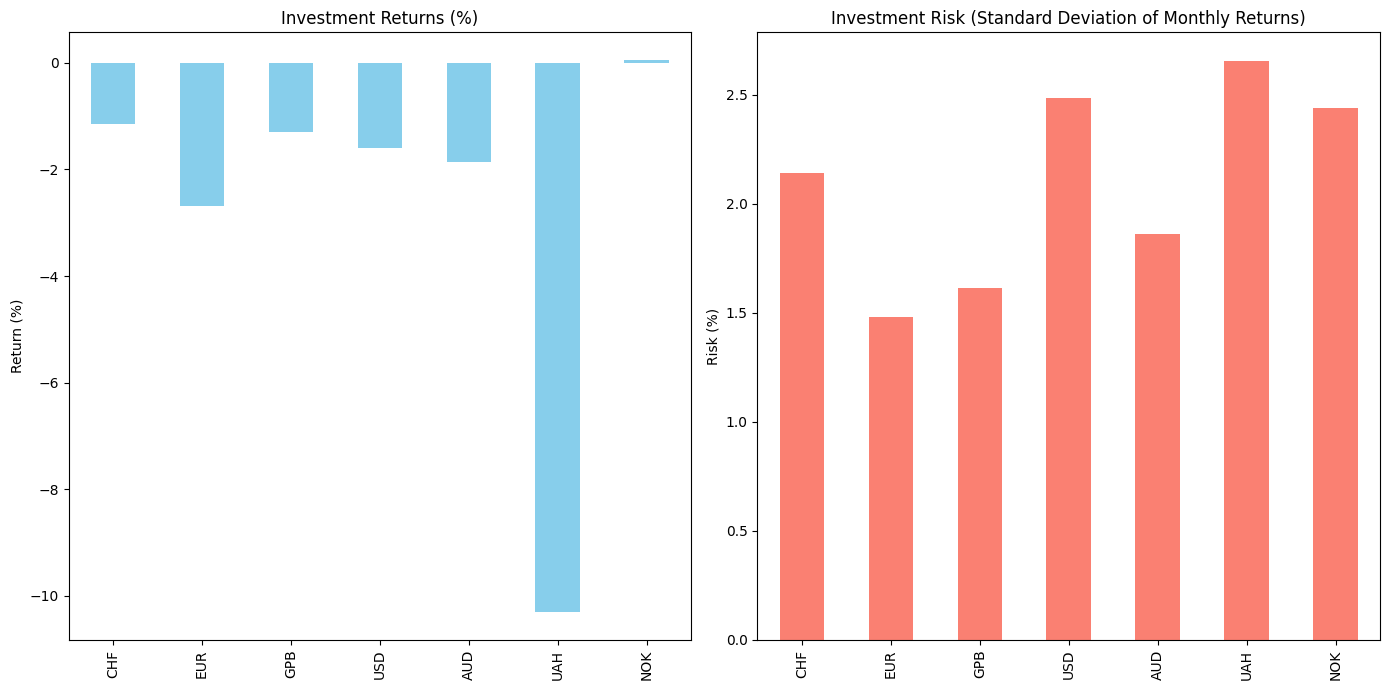

In [5]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
investment_returns.plot(kind='bar', color='skyblue')
plt.title('Investment Returns (%)')
plt.ylabel('Return (%)')

plt.subplot(1, 2, 2)
investment_risk.plot(kind='bar', color='salmon')
plt.title('Investment Risk (Standard Deviation of Monthly Returns)')
plt.ylabel('Risk (%)')

plt.tight_layout()
plt.savefig('data/investment_returns_and_risk.pdf')
plt.show()